# Logistic Regression Explained Clearly

# Understanding Logistic Regression

Logistic Regression is a popular machine learning algorithm primarily used for binary classification tasks, where the outcome has two possible values (like Yes/No, Pass/Fail, True/False).

In this notebook, we’ll explore Logistic Regression by predicting whether a person will buy a product based on their age and estimated salary. We'll use a synthetic dataset for simplicity and better clarity.


In [1]:
# Importing necessary libraries
# - numpy and pandas for data manipulation
# - matplotlib for plotting
# - sklearn modules for ML tasks and preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


## Creating and Preparing Data

We'll create a synthetic dataset representing users' age and estimated salary, and whether they purchased a product.

In [3]:
# Generate random values for age and estimated salary
# Create labels: 1 if age > 35 and salary > 50000, else 0
np.random.seed(42)
age = np.random.randint(18, 60, 200)
salary = np.random.randint(20000, 100000,200)
purchased = (age>35) & (salary>50000)
purchased = purchased.astype(int)

In [8]:
# Combine features and label into a DataFrame
data = pd.DataFrame({"Age": age, "EstimatedSalary": salary, "Purchased": purchased})
data.head()

,Age,EstimatedSalary,Purchased
0,56,45342,0
1,46,57157,1
2,32,87863,0
3,25,72083,0
4,38,85733,1


In [6]:
# Split data into training and testing sets (75%-25%)
X = data[["Age", "EstimatedSalary"]]
y = data["Purchased"]

In [7]:
X.head()

,Age,EstimatedSalary
0,56,45342
1,46,57157
2,32,87863
3,25,72083
4,38,85733


In [9]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [10]:
# Standardize features for better performance

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Logistic Regression Model

We train the logistic regression model on the scaled training dataset.

In [11]:
# Initialize and fit the Logistic Regression model
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Making Predictions

Let's predict whether people will purchase the product based on their age and salary.

In [12]:
print("Predictions:", log_reg.predict(X_test[:5]))
print("Prediction Probabilities:", log_reg.predict_proba(X_test[:5]))

Predictions: [1 1 1 1 0]
Prediction Probabilities: [[0.06149634 0.93850366]
 [0.0179246  0.9820754 ]
 [0.02151777 0.97848223]
 [0.21107071 0.78892929]
 [0.6373268  0.3626732 ]]


## Evaluating the Model

We will use a confusion matrix and classification report to evaluate performance.

In [13]:
# Generate predictions for the test set
# Print confusion matrix and precision/recall/F1-score

y_pred = log_reg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[29  1]
 [ 3 17]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        30
           1       0.94      0.85      0.89        20

    accuracy                           0.92        50
   macro avg       0.93      0.91      0.92        50
weighted avg       0.92      0.92      0.92        50



## Visualizing the Decision Boundary

We can plot decision boundaries by projecting the 2D feature space.

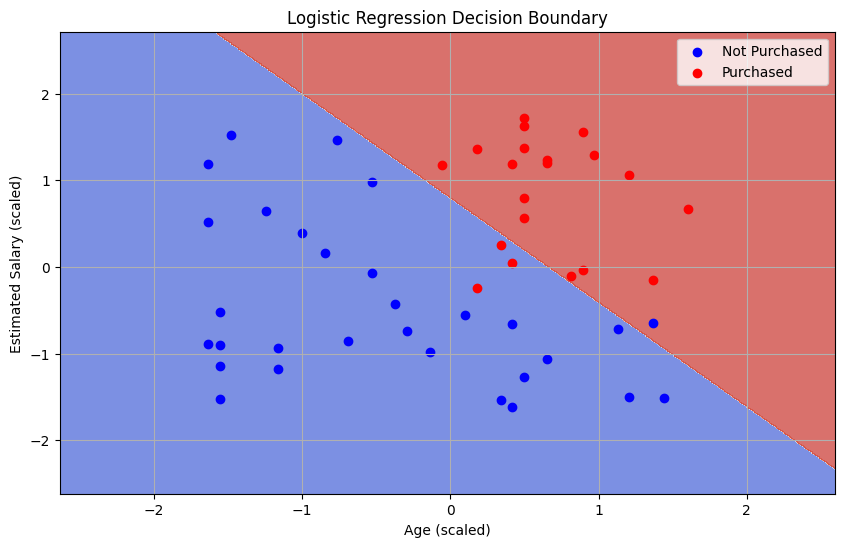

In [14]:
# Generate a mesh grid and predict class for each grid point
# Plot the decision boundary and data points


X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.figure(figsize=(10, 6))
plt.contourf(X1, X2, log_reg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=plt.cm.coolwarm)
plt.scatter(X_set[y_set == 0, 0], X_set[y_set == 0, 1], c='blue', label='Not Purchased')
plt.scatter(X_set[y_set == 1, 0], X_set[y_set == 1, 1], c='red', label='Purchased')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Age (scaled)')
plt.ylabel('Estimated Salary (scaled)')
plt.legend()
plt.grid(True)
plt.show()


## Interpretation

- The shaded region shows the model's prediction areas.
- The boundary between red and blue indicates the model's threshold for classifying purchase decisions.

### Key Takeaways
- Logistic regression is ideal for binary classification problems.
- It outputs probabilities and allows threshold-based decisions.
- Visualization helps understand model behavior.

'''
## Conclusion

Logistic Regression is a powerful and interpretable method to classify outcomes based on numeric features. This notebook used a simple and practical example of predicting product purchase based on age and salary.
'''